# Proyecto Equipo 5
# Uso del Módulo 3 - Análisis de datos con Python
## Análisis de Datos credit record

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Leer la versión larga del historial

In [2]:
df_credit_record = pd.read_csv('../archive/credit_record_large.csv')
df_credit_record
#0: 1-29 days past due
#1: 30-59 days past due
#2: 60-89 days overdue
#3: 90-119 days overdue
#4: 120-149 days overdue
#5: Overdue or bad debts, write-offs for more than 150 days
#C: paid off that month
#X: No loan for the month

,ID,-60,-59,-58,-57,-56,-55,-54,-53,-52,...,end_account_month,timespan,class C,class 0,class 1,class 2,class 3,class 4,class 5,class X
0,5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,4,0,3,0,0,0,0,0,1
1,5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,19,9,10,0,0,0,0,0,0
2,5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,22,0,0,0,0,0,0,0,22
3,5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,15,0,0,0,0,0,0,0,15
4,5001715,NaN,X,X,X,X,X,X,X,X,...,0,60,0,0,0,0,0,0,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45980,5150482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-11,18,6,12,0,0,0,0,0,0
45981,5150483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,18,0,0,0,0,0,0,0,18
45982,5150484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,13,1,12,0,0,0,0,0,0
45983,5150485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,2,0,2,0,0,0,0,0,0


## Leer el archivo de las aplicaciones para obtener el ID de los clientes

In [3]:
df_application = pd.read_csv('../archive/application_credit_record.csv')
ids_application = df_application['ID']
ids_application.head()

0    5008804
1    5008805
2    5008806
3    5008808
4    5008809
Name: ID, dtype: int64

## Unir los datos para obtener sólo los solicitantes con application y credit records

In [4]:
df_credit = pd.merge(ids_application,df_credit_record,on='ID')
df_credit.head()

,ID,-60,-59,-58,-57,-56,-55,-54,-53,-52,...,end_account_month,timespan,class C,class 0,class 1,class 2,class 3,class 4,class 5,class X
0,5008804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,16,13,1,1,0,0,0,0,1
1,5008805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,15,12,1,1,0,0,0,0,1
2,5008806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,30,7,7,0,0,0,0,0,16
3,5008808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,5,0,2,0,0,0,0,0,3
4,5008809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-22,5,0,0,0,0,0,0,0,5


## Análisis estadístico de los datos

In [5]:
df_credit.describe()

,ID,open_account_month,end_account_month,timespan,class C,class 0,class 1,class 2,class 3,class 4,class 5,class X
count,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,-26.164193,-5.831802,21.332392,9.039032,7.972516,0.239926,0.021971,0.007845,0.005870,0.041885,4.003346
std,4.187524e+04,16.501854,11.326494,14.911849,13.026453,7.748513,0.947265,0.209588,0.100982,0.093212,0.895565,8.667466
min,5.008804e+06,-60.000000,-60.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.042028e+06,-39.000000,-6.000000,9.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.074614e+06,-24.000000,0.000000,18.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.115396e+06,-12.000000,0.000000,31.000000,15.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,5.150487e+06,0.000000,0.000000,61.000000,59.000000,60.000000,27.000000,8.000000,4.000000,7.000000,48.000000,61.000000


In [6]:
#Descripción de timespan
mediana = df_credit['timespan'].median
q1 = df_credit['timespan'].quantile(0.25)
q2 = df_credit['timespan'].quantile(0.50)
q3 = df_credit['timespan'].quantile(0.75)
print("Primer cuartil (25%):", q1)
print("Segundo cuartil o Mediana (50%):", q2)
print("Tercer cuartil (75%):", q3)

Primer cuartil (25%): 9.0
Segundo cuartil o Mediana (50%): 18.0
Tercer cuartil (75%): 31.0


Text(0.5, 0, 'timespan (Meses)')

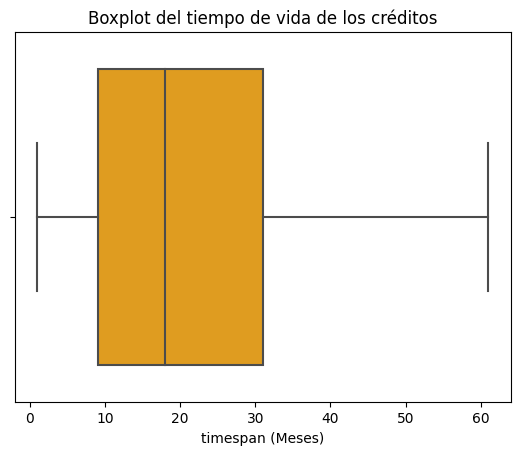

In [7]:
#Boxplot de timespan
sns.boxplot(x=df_credit['timespan'],color='orange')
plt.title('Boxplot del tiempo de vida de los créditos')
plt.xlabel('timespan (Meses)')

Text(0.5, 0, 'timespan (Meses)')

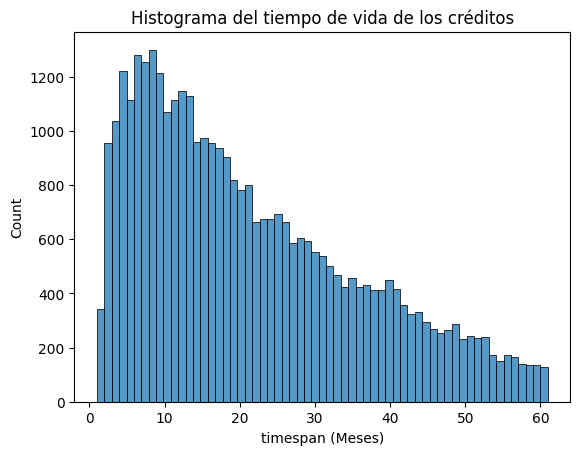

In [8]:
#Histograma de tiempo de vida de los créditos
sns.histplot(df_credit['timespan'], bins=61)
plt.title('Histograma del tiempo de vida de los créditos')
plt.xlabel('timespan (Meses)')

In [9]:
#Conteo por mes
df_record = df_credit.drop(columns=['ID','open_account_month','end_account_month','timespan','class C','class 0','class 1','class 2','class 3','class 4','class 5','class X'])
num_class_x = pd.Series((df_record == 'X').sum())
num_class_c = (df_record == 'C').sum()
num_class_0 = (df_record == '0').sum()
num_class_1 = (df_record == '1').sum()
num_class_2 = (df_record == '2').sum()
num_class_3 = (df_record == '3').sum()
num_class_4 = (df_record == '4').sum()
num_class_5 = (df_record == '5').sum()
num_not_NaN = df_record.notna().sum()
print(num_class_x)

-60     137
-59     192
-58     270
-57     337
-56     407
       ... 
-4     4203
-3     4207
-2     4281
-1     4201
0      4487
Length: 61, dtype: int64


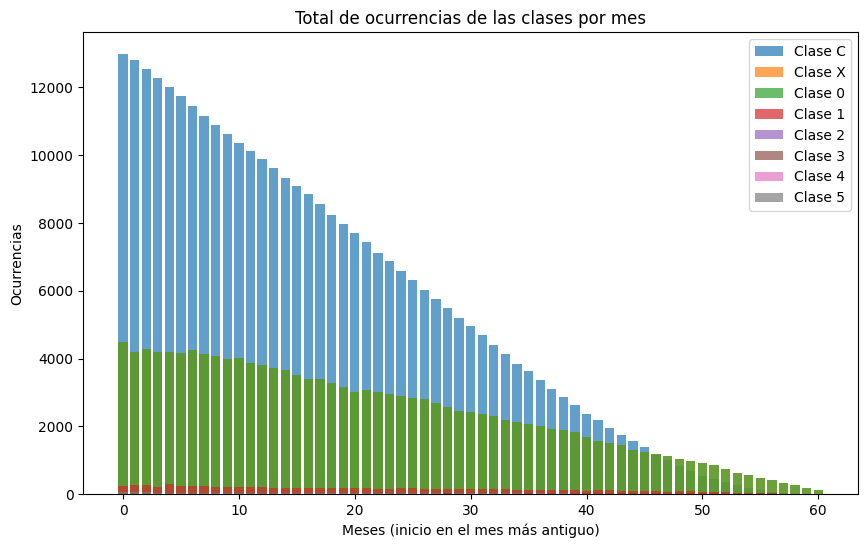

In [10]:
indices = np.arange(61)
plt.figure(figsize=(10,6))
plt.bar(indices, num_class_c.iloc[::-1], label='Clase C',alpha=0.7)
plt.bar(indices, num_class_x.iloc[::-1], label='Clase X',alpha=0.7)
plt.bar(indices, num_class_x.iloc[::-1], label='Clase 0',alpha=0.7)
plt.bar(indices, num_class_1.iloc[::-1], label='Clase 1',alpha=0.7)
plt.bar(indices, num_class_2.iloc[::-1], label='Clase 2',alpha=0.7)
plt.bar(indices, num_class_3.iloc[::-1], label='Clase 3',alpha=0.7)
plt.bar(indices, num_class_4.iloc[::-1], label='Clase 4',alpha=0.7)
plt.bar(indices, num_class_5.iloc[::-1], label='Clase 5',alpha=0.7)
plt.title('Total de ocurrencias de las clases por mes')
plt.xlabel('Meses (inicio en el mes más antiguo)')
plt.ylabel('Ocurrencias')
plt.legend()

Text(0, 0.5, 'Ocurrencias')

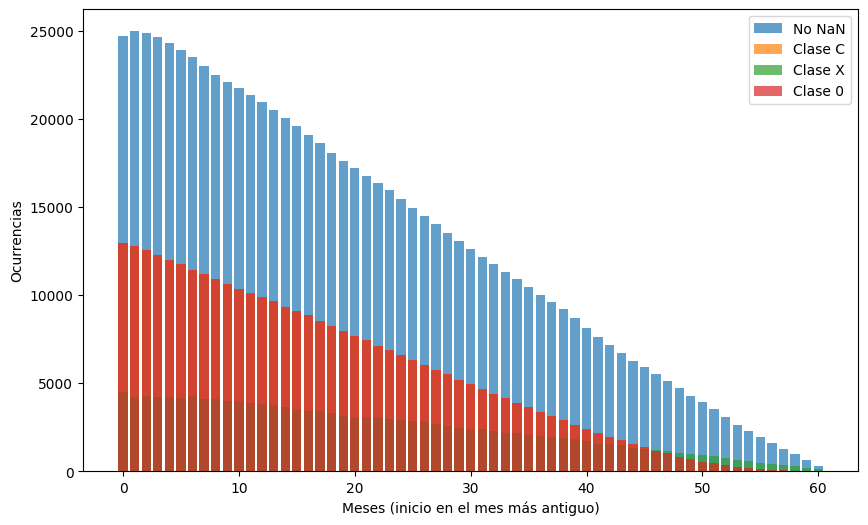

In [11]:
#Comparación contra histograma
valores, frecuencias = np.unique(df_credit['timespan'], return_counts=True)
plt.figure(figsize=(10,6))
plt.bar(indices, num_not_NaN.iloc[::-1], label='No NaN',alpha=0.7)
plt.bar(indices, num_class_c.iloc[::-1], label='Clase C',alpha=0.7)
plt.bar(indices, num_class_x.iloc[::-1], label='Clase X',alpha=0.7)
plt.bar(indices, num_class_c.iloc[::-1], label='Clase 0',alpha=0.7)
plt.legend()
plt.xlabel('Meses (inicio en el mes más antiguo)')
plt.ylabel('Ocurrencias')

In [12]:
data_record = pd.DataFrame({'X':num_class_x,'C':num_class_c,'0':num_class_0,'1':num_class_1,'2':num_class_2,'3':num_class_3,'4':num_class_4,'5':num_class_5})
data_record_percen = data_record.divide(data_record.sum(axis=1),axis=0)
data_record_percen.describe()

,X,C,0,1,2,3,4,5
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,0.206312,0.334985,0.443143,0.012060,0.001136,0.000416,0.000273,0.001674
std,0.041012,0.155792,0.121645,0.003383,0.000678,0.000345,0.000222,0.000713
min,0.168289,0.003115,0.279102,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.182102,0.234447,0.341122,0.010200,0.000698,0.000205,0.000121,0.001672
50%,0.193428,0.393800,0.398928,0.011484,0.001023,0.000326,0.000238,0.001901
75%,0.217456,0.465106,0.531446,0.013854,0.001452,0.000521,0.000420,0.002094
max,0.426791,0.525859,0.687151,0.019096,0.003027,0.001536,0.000932,0.002615


Text(0, 0.5, 'Porcentaje')

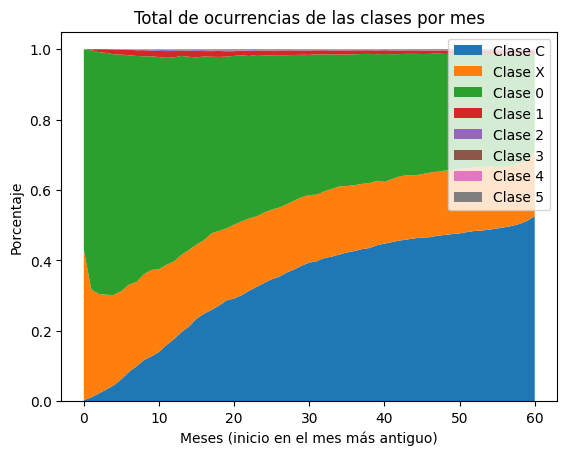

In [13]:
plt.stackplot(indices,data_record_percen['C'],data_record_percen['X'],data_record_percen['0'],data_record_percen['1'],data_record_percen['2'],data_record_percen['3'],data_record_percen['4'],data_record_percen['5'], labels=['Clase C','Clase X','Clase 0','Clase 1','Clase 2','Clase 3','Clase 4','Clase 5'])
plt.legend()
plt.title('Total de ocurrencias de las clases por mes')
plt.xlabel('Meses (inicio en el mes más antiguo)')
plt.ylabel('Porcentaje')

### Las cuentas se componen principalmente por clase X (sin préstamo), C (totaleros) y 0 (de 1-29 días de retraso).